## Overview
Data - https://drive.google.com/drive/folders/13zKKNCa5srQSC8pqYWCIn5oRPXMlOGid

- Regression analysis of Air Quality dataset
- Target - C6H6(GT) --> **Mis-read this, discussed with <ins>Mentor</ins> will change the target to Temperature(Celcius) instead**
- -200 indicates missing values

**Required**
Jupyter notebook file (.ipynb) or link to colab/github attached



---------------------------------------------------

## Data Set Information:

Main link: https://archive.ics.uci.edu/ml/datasets/Air+Quality#
<br>

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.
<br>

**Attribute Information:**
1. Date (DD/MM/YYYY)
2. Time (HH.MM.SS)
3. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
4. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
5. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
6. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
7. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
8. True hourly averaged NOx concentration in ppb (reference analyzer)
9. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
10. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
11. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
12. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
13. Temperature in  °C
14. Relative Humidity (%)
15. AH Absolute Humidity
<br>
<br>

**Relevant Papers:**<br>
S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005, [Web Link](http://dx.doi.org/10.1016/j.snb.2007.09.060).<br>

([Web Link](http://www.sciencedirect.com/science/article/pii/S0925400507007691))
<br>

Saverio De Vito, Marco Piga, Luca Martinotto, Girolamo Di Francia, CO, NO2 and NOx urban pollution monitoring with on-field calibrated electronic nose by automatic bayesian regularization, Sensors and Actuators B: Chemical, Volume 143, Issue 1, 4 December 2009, Pages 182-191, ISSN 0925-4005, [Web Link](http://dx.doi.org/10.1016/j.snb.2009.08.041).<br>

([Web Link](http://www.sciencedirect.com/science/article/pii/S092540050900673X))

S. De Vito, G. Fattoruso, M. Pardo, F. Tortorella and G. Di Francia, 'Semi-Supervised Learning Techniques in Artificial Olfaction: A Novel Approach to Classification Problems and Drift Counteraction,' in IEEE Sensors Journal, vol. 12, no. 11, pp. 3215-3224, Nov. 2012.
doi: 10.1109/JSEN.2012.2192425
<br>

---------------------------------------------------

In [ ]:
#Import Python Library

import pandas as pd
import numpy as np

import scipy.stats as st
import math
from datetime import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams


from sklearn import preprocessing, linear_model
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# from sklearn.pipeline import make_pipeline


# pip install statsmodels
import statsmodels.api as sm
# from statsmodels.formula.api import ols


pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx


In [ ]:
# pip install openpyxl

# Import/read the excel file
df = pd.read_excel('AirQualityUCI.xlsx', index_col=None)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
# There are some unnamed columns, using this method to remove them
df = df[df.filter(regex='^(?!Unnamed)').columns]
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487


In [ ]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [ ]:
df.shape

(9357, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [ ]:
#convert datetime for 'Date' column to string/object type, in case need for inspection
df["Date"] = df["Date"].dt.strftime('%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
#To see if any missing value
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Although the output shows no missing value, but keep in mind dataset description mentioned the missing value has been indicated as '-200'

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

Date              391
Time               24
CO(GT)             97
PT08.S1(CO)      3246
NMHC(GT)          430
C6H6(GT)         3773
PT08.S2(NMHC)    3773
NOx(GT)          2467
PT08.S3(NOx)     3519
NO2(GT)          1420
PT08.S4(NO2)     4408
PT08.S5(O3)      4679
T                3368
RH               4903
AH               8988
dtype: int64

In [ ]:
#To see how many missing value (-200) in each of the column

df[df == -200].count()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Noticed the following columns have identical number of 366 rows consist of the missing value(-200), since they are quite small percentage over the entire data, decided to try remove all the missing value rows under the column name "PT08.S1(CO)" to see if the rest of the columns actually will be clear up as well.
- PT08.S1(CO)
- C6H6(GT)        
- PT08.S2(NMHC)   
- PT08.S3(NOx)     
- PT08.S4(NO2)   
- PT08.S5(O3)     
- T             
- RH             
- AH            

In [ ]:
remove_row = df[df["PT08.S1(CO)"]== -200].index
# remove_row

df2 = df.drop(remove_row, axis=0)
df2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df2[df2 == -200].count()

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

So indeed by removing the missing value(-200) under the the column name "PT08.S1(CO)" also cleared the columns that have missing value(-200). With that, will remain as it is.

In [ ]:
#Check the latest shape of the dataset after clearing the missing value in most of the columns.
df2.shape

(8991, 15)

In [ ]:
# About 90% of the data/rows under the Column "NMHC(GT)" are -200 which is missing value, hence decided to drop this column for good
df2 = df2.drop(columns="NMHC(GT)")
df2.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


Now that we left with 3 more columns that have missing value(-200) which is "CO(GT)", "NOx(GT)", "NO2(GT)". <br>
<br>
Re-read the dataset description and find that these column is reference analyzer for the device, it isn't really the actual value that the device is recording. With that I assuming that is not really relevant to the outcome we trying to achieve in this model training. So I decided to drop all the columns that is reference analyzer from the dataset.

In [ ]:
#Since there is no use of Data & time so we dropping them off as well
df2 = df2.drop(columns=["Date","Time","CO(GT)","C6H6(GT)","NOx(GT)", "NO2(GT)"])
df2.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.00,1045.50,1056.25,1692.00,1267.50,13.60,48.875001,0.757754
1,1292.25,954.75,1173.75,1558.75,972.25,13.30,47.700000,0.725487
2,1402.00,939.25,1140.00,1554.50,1074.00,11.90,53.975000,0.750239
3,1375.50,948.25,1092.00,1583.75,1203.25,11.00,60.000000,0.786713
4,1272.25,835.50,1205.00,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
#Rename some of the columns to be more recognizable
df2.rename(columns = {"T":"Temp_Celcius",
                     "RH":"Humidity",
                     "AH": "Abs_Humidity"}, inplace=True)
df2.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Temp_Celcius,Humidity,Abs_Humidity
0,1360.00,1045.50,1056.25,1692.00,1267.50,13.60,48.875001,0.757754
1,1292.25,954.75,1173.75,1558.75,972.25,13.30,47.700000,0.725487
2,1402.00,939.25,1140.00,1554.50,1074.00,11.90,53.975000,0.750239
3,1375.50,948.25,1092.00,1583.75,1203.25,11.00,60.000000,0.786713
4,1272.25,835.50,1205.00,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
#Looking at the correlation after satisfied with the clean up the dataset
df2.corr()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Temp_Celcius,Humidity,Abs_Humidity
PT08.S1(CO),1.000000,0.892972,-0.771918,0.682874,0.899326,0.048628,0.114607,0.135323
PT08.S2(NMHC),0.892972,1.000000,-0.796687,0.777235,0.880590,0.241330,-0.090352,0.186906
PT08.S3(NOx),-0.771918,-0.796687,1.000000,-0.538460,-0.796554,-0.145133,-0.056730,-0.232021
PT08.S4(NO2),0.682874,0.777235,-0.538460,1.000000,0.591137,0.561333,-0.032188,0.629644
PT08.S5(O3),0.899326,0.880590,-0.796554,0.591137,1.000000,-0.027193,0.124952,0.070738
Temp_Celcius,0.048628,0.241330,-0.145133,0.561333,-0.027193,1.000000,-0.578569,0.656471
Humidity,0.114607,-0.090352,-0.056730,-0.032188,0.124952,-0.578569,1.000000,0.167971
Abs_Humidity,0.135323,0.186906,-0.232021,0.629644,0.070738,0.656471,0.167971,1.000000


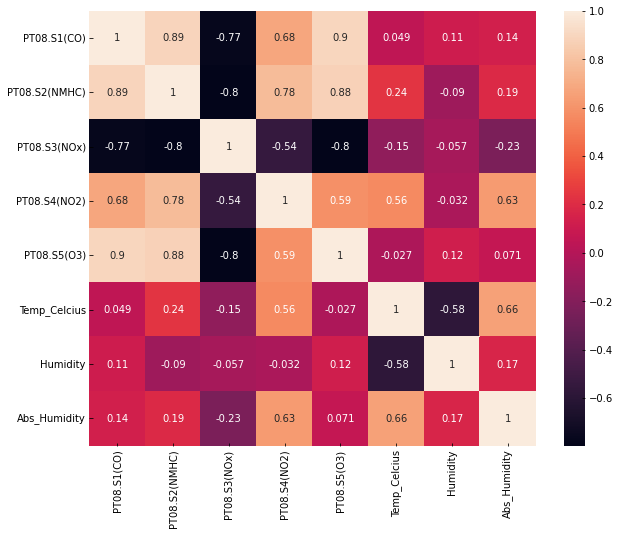

In [ ]:
#Putting into the heatmap for a better view
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(df2.corr(), annot=True)

plt.show()

As the given Target output is not strong variable to tell a story, it's an reference analyzer and has missing values, so I take own assumption of trying to find how these air quality data influence the Temperature changes. That being said, the column "Temp_Celcius" will be our target variable(Y).<br>
<br>
Below is scatter plot to see how each of the air quality data influnces the Temperature in Celcius.

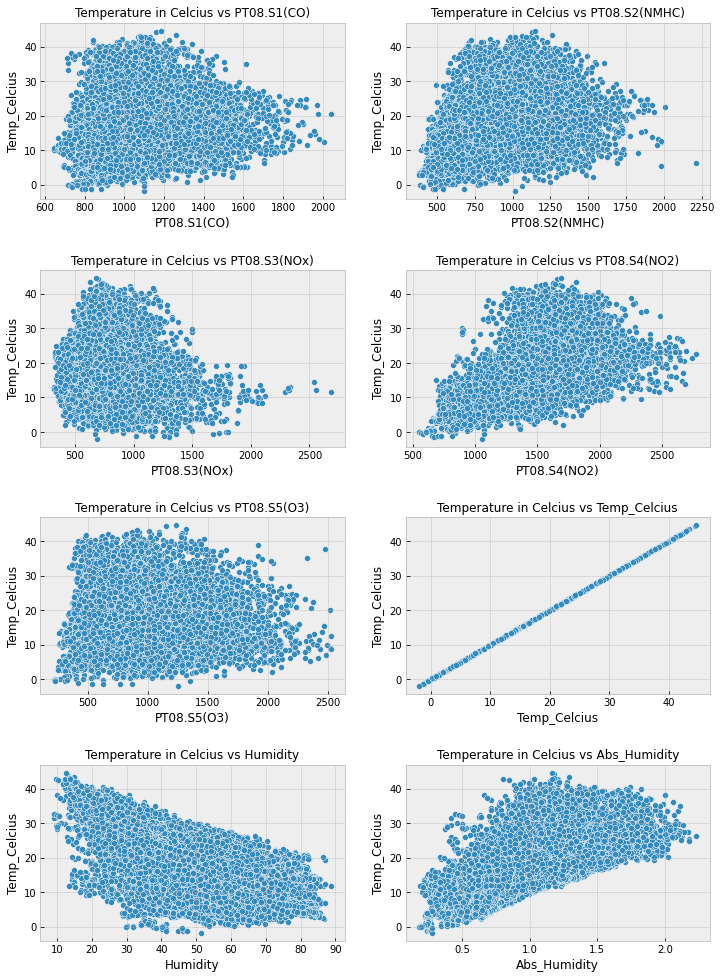

In [ ]:
fig = plt.figure(figsize=(12,26))

for i, col in enumerate(df2.columns):
    fig.add_subplot(6, 2, i+1)
    plt.subplots_adjust(hspace=.4)
    sns.scatterplot(x=col,y=df2["Temp_Celcius"], data=df2)
    plt.title("Temperature in Celcius vs "+col,fontsize=12)

    
plt.show()

<Figure size 864x864 with 0 Axes>

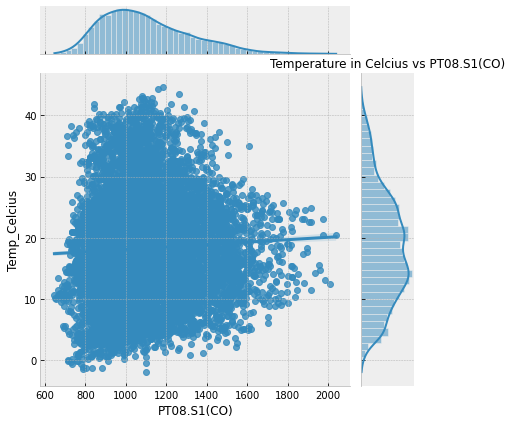

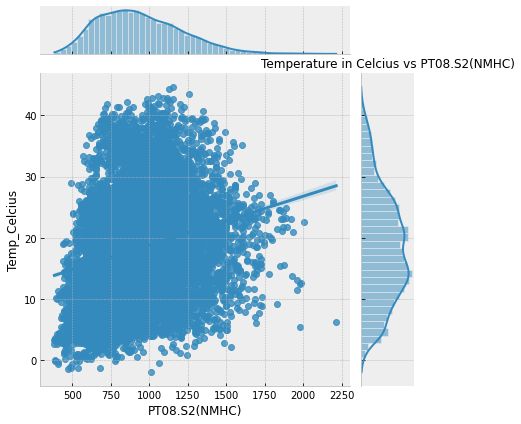

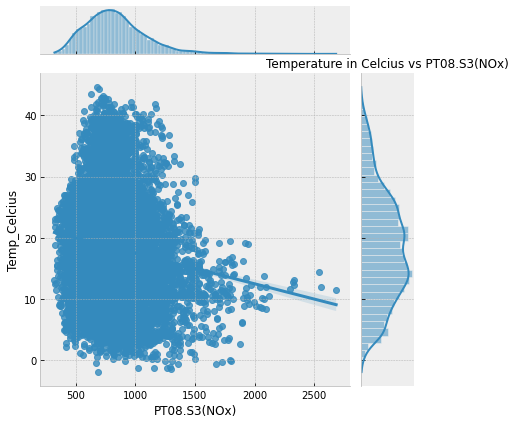

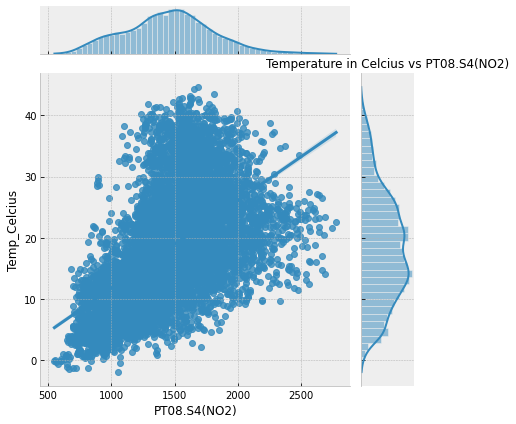

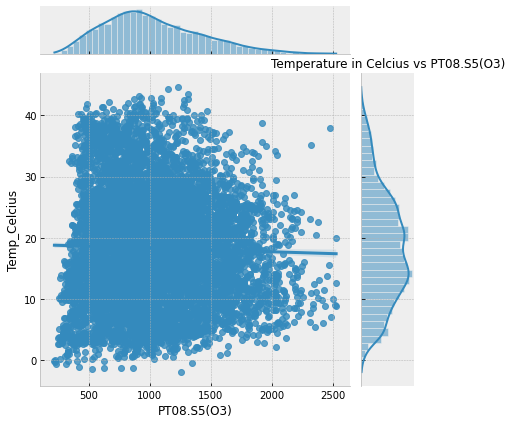

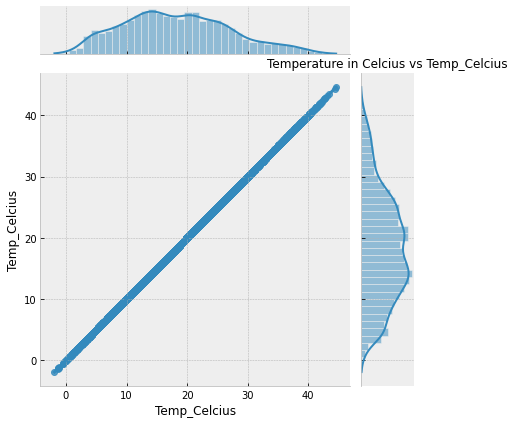

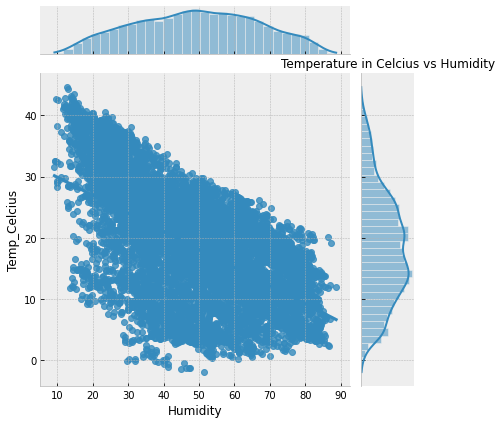

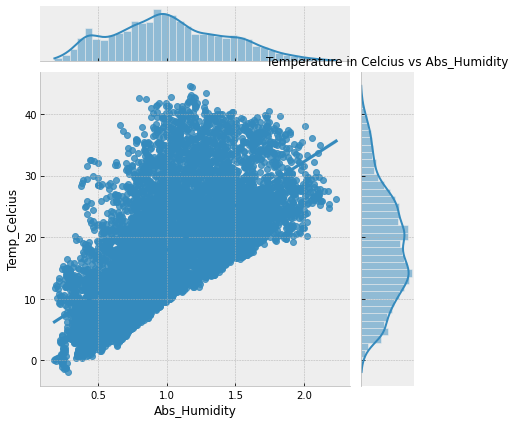

In [ ]:
fig = plt.figure(figsize=(12,12))

for i, col in enumerate(df2.columns):
#     fig.add_subplot(6, 2, i+1)
    plt.subplots_adjust(hspace=.4)
    sns.jointplot(x=col,y=df2["Temp_Celcius"], data=df2, kind='reg')
    plt.title("Temperature in Celcius vs "+col,fontsize=12)

    
plt.show()

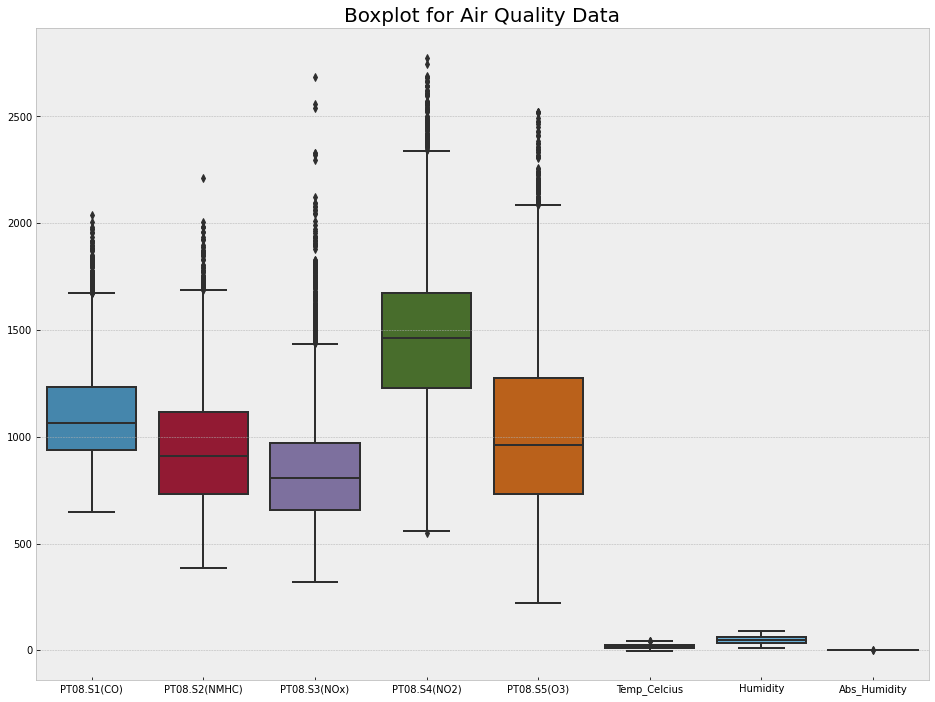

In [ ]:
# Boxplot
fig = plt.figure(figsize=(16,12))

ax = sns.boxplot(data=df2)
ax.set_title("Boxplot for Air Quality Data", fontsize=20)

plt.show()

From the boxplot above, we can see there isn't any extreme outlier and majority of the data among 500 to 2000 value. Where Temperature, Humidity and Absolute Humudity are below 500 which is correct as usual measurement value for these records are between 0 to 100.

In [ ]:
# Final inspect and understanding the data types before moving onto next step - Model building and training
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    8991 non-null   float64
 1   PT08.S2(NMHC)  8991 non-null   float64
 2   PT08.S3(NOx)   8991 non-null   float64
 3   PT08.S4(NO2)   8991 non-null   float64
 4   PT08.S5(O3)    8991 non-null   float64
 5   Temp_Celcius   8991 non-null   float64
 6   Humidity       8991 non-null   float64
 7   Abs_Humidity   8991 non-null   float64
dtypes: float64(8)
memory usage: 632.2 KB


### Feature Engineering

After cleaning the data and changed the dependant variable/target output, the remaining features doesn't required feature engineering as they are in numerical type. Will proceed with **Normalization** only.

## Baseline Mode (Linear Regression) & Model Training

### Split dataset into Train & Test set

In [ ]:
X = df2.drop(columns = "Temp_Celcius")
Y = pd.DataFrame(df2["Temp_Celcius"])

In [ ]:
print(X.shape, Y.shape)

(8991, 7) (8991, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6293, 7) (6293, 1)
(2698, 7) (2698, 1)


### Normalization

Scaler used before train and test split often will have data leakage issue, therefore doing Normalization/Scaler after splited the dataset into train and test set here. <br>

Choosing **MinMaxScaler** for the normalization is because this scaler will transform the data proportionally within the range 0,1 as I didn't want to risk the chance of distortion if using StandardScaler instead.

In [ ]:
# Normalize the data between 0 to 1
scaler = MinMaxScaler()

# For X
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# For Y
y_train = pd.DataFrame(scaler.fit_transform(y_train), columns=y_train.columns)
y_test = pd.DataFrame(scaler.fit_transform(y_test), columns=y_test.columns)

### Model training - Linear Regression without Regulation

In [ ]:
lm=linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
print("Linear Regression Prediction Score:",model.score(X_test, y_test))

Linear Regression Prediction Score: 0.9266839227420471


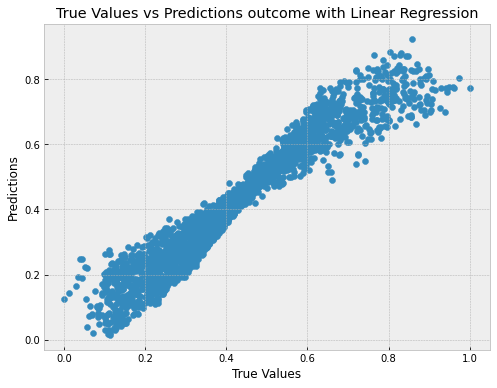

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions)

plt.title("True Values vs Predictions outcome with Linear Regression")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.show()

As we can see from our scatter plot above, the dataset actual values almost well fitted with the predicted values. We can make assumption that Linear Regression is a good choice of model for this dataset. <br>
<br>
To confirm the model suitability, we will going through a few methods/metrics to further evaluate.

### Cross Validation

In [ ]:
kf = KFold(n_splits=5, random_state=50, shuffle=True) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=5, random_state=50, shuffle=True)


In [ ]:
# Perform 5-fold cross validation
cv_scores = cross_val_score(lm, X, Y, cv=kf)
print("Cross validation scores:", cv_scores)

Cross validation scores: [0.93101669 0.9248428  0.92620592 0.92654839 0.92976924]


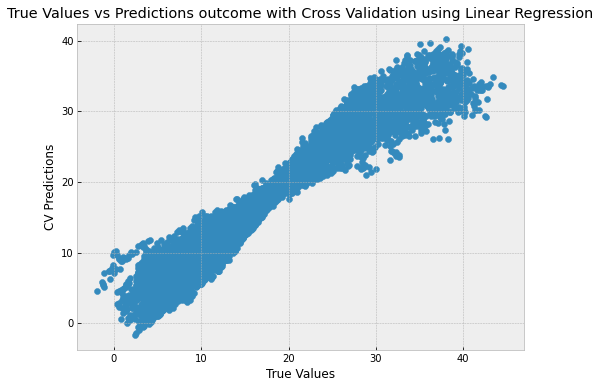

In [ ]:
# Plot to see how well if the 5-folds fit with the dataset 
cv_predict = cross_val_predict(lm, X, Y, cv=kf)

fig = plt.figure(figsize=(8,6))
plt.scatter(Y,cv_predict)

plt.title("True Values vs Predictions outcome with Cross Validation using Linear Regression")
plt.xlabel("True Values")
plt.ylabel("CV Predictions")

plt.show()

With the Cross Validation, we can see that the values of the dataset are highly perfrom/fit well with the Linear Regression Model. Each of the fold of all the 5 folds have scores approximately between 0.924 to 0.931.

### Metrics

#### R-squared & Adjusted R-squared

First I will evaluate the model using R-squared & Adjusted R-squared 
- As <ins>**R-squared**</ins> gives the degree of variability in the target variable that is explained by the model or the independent variables
- As <ins>**Adjusted R-squared**</ins> will make up for the flaw in R-squared which is prevent overfitting

In [ ]:
# Decided with R^2 and Adjusted R^2 as the metrics for this exercise.

r2 = r2_score(y_test, predictions)

#calculating for Adjusted r2 score
k = X_test.shape[1]
n = len(X_test)

adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)


print("r2 score:", r2)
print("Adjusted r2 score:", adj_r2)

r2 score: 0.9266839227420471
Adjusted r2 score: 0.9264931374108927


We can see the score for R-squared and adjusted R-squared are quite similar and both are pretty high. That means the independent variables are fitting well with this model training and coefficient to the target(dependent) variable.

#### Mean Square Error(MSE) & Root Mean Square Error(RMSE)

Next, we will use Mean Square Error(MSE) & Root Mean Square Error(RMSE) to evalute the model performance.

In [ ]:
MSE = mean_squared_error(y_test, predictions)
RMSE = math.sqrt(MSE)

print("MSE score:", MSE)
print("RMSE score:", RMSE)

MSE score: 0.0026304406291231177
RMSE score: 0.05128782145035133


The result of **MSE & RMSE** are nearly to **0.0**. This evaluate that Linear Regression is a good choice of the model for this dataset and to predict the target outcome we looking to achieve.

### Feature Importance

In [ ]:
# Feature Importance
importance = pd.DataFrame(model.coef_).T
importance.index = X.columns
importance

,0
PT08.S1(CO),-0.023694
PT08.S2(NMHC),0.004025
PT08.S3(NOx),-0.059454
PT08.S4(NO2),0.235256
PT08.S5(O3),-0.129562
Humidity,-0.591909
Abs_Humidity,0.635193


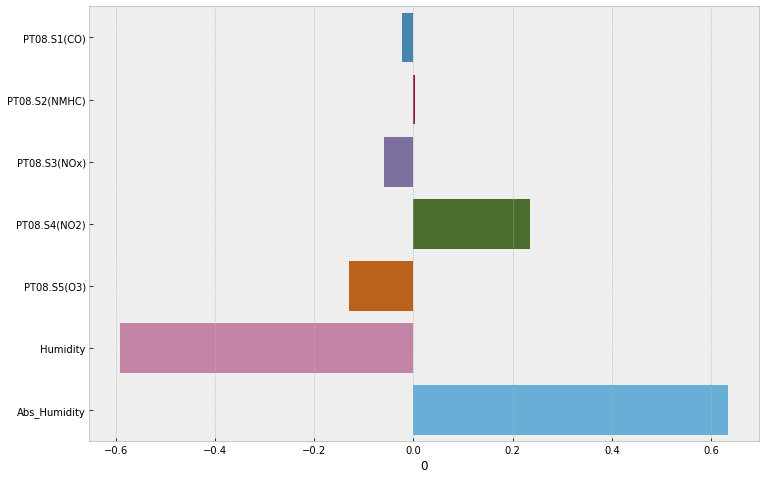

In [ ]:
# Plot to visualize better
plt.figure(figsize=(12,8))

sns.barplot(y=importance.index, x=0, data=importance, orient='h')

plt.show()

From the barplot above, we can see the outcome of Feature Importance of this dataset with Linear Regression model. <br>
<br>
We can see that **PT08.S4(NO2)** and **Abs_Humidity** have positive value here. This means they are highly coefficient to our target variable - Temperature Celcius. For instances, Absolute humidity is a measure of the actual amount of water vapor (moisture) in the air, regardless of the air's temperature. The higher the amount of water vapor, the higher the absolute humidity. <br>
<br>
On the other hand, we see **Humidity** has high negative value. Yet, this doesn't mean that Humidity is not an useful variable but rather Humidity is <ins>**inversely proportional**</ins>. This is because as scientific reported that when the air temperature increases, air can hold more water molecules, and its relative humidity decreases. Therefore temperatures drop, relative humidity increases.

### Hyperparameter tuning/ Regularization

Given the size of our dataset **Ridge regression** is better for the regularization(Hyperparameter tuning) here.


In [ ]:
# define model alpha
model_rr = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=kf, scoring='neg_mean_absolute_error')
# fit model
model_rr.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model_rr.alpha_)

alpha: 0.990000


In [ ]:
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization
ridge = Ridge(alpha=0.99)
model_ridge = ridge.fit(X_train, y_train)
ridge_prediction = model_ridge.predict(X_test)

#See the score of Ridge Regression
Ridge_train_score = ridge.score(X_train,y_train)
print("Ridge Regression score for Train set:",Ridge_train_score)

Ridge_test_score = ridge.score(X_test, y_test)
print("Ridge Regression score for Test set:",Ridge_test_score)

Ridge Regression score for Train set: 0.9275846370268744
Ridge Regression score for Test set: 0.9269567659088613


In [ ]:
#Evaluation

#Apply it on Test set to check the scores with CV
ridge_r2 = cross_val_score(ridge, X_test, y_test, scoring='r2', cv=kf)
ridge_mse = cross_val_score(ridge, X_test, y_test, scoring='neg_mean_squared_error', cv=kf)

# force scores to be positive
ridge_scores_r2 = np.absolute(ridge_r2)
ridge_scores_mse = np.absolute(ridge_mse)

print('Ridge R2: %.3f (%.3f)' % (np.mean(ridge_scores_r2), np.std(ridge_scores_r2)))
print('Ridge MSE: %.3f (%.3f)' % (np.mean(ridge_scores_mse), np.std(ridge_scores_mse)))

Ridge R2: 0.927 (0.006)
Ridge MSE: 0.003 (0.000)


### Residual Analysis

In [ ]:
residuals = y_test - predictions

pred = pd.DataFrame(predictions)
df_residuals = pd.concat([y_test,pred,residuals], axis=1)
df_residuals.columns=("Actual_Temp","Pred_Temp","Residuals_Temp")
df_residuals

,Actual_Temp,Pred_Temp,Residuals_Temp
0,0.929032,0.774483,0.154550
1,0.139247,0.092192,0.047055
2,0.345161,0.340168,0.004993
3,0.469355,0.518289,-0.048934
4,0.189247,0.218775,-0.029527
...,...,...,...
2693,0.724731,0.570041,0.154690
2694,0.127419,0.180446,-0.053027
2695,0.230108,0.257594,-0.027486
2696,0.638710,0.767965,-0.129255


In [ ]:
df_residuals.describe()

,Actual_Temp,Pred_Temp,Residuals_Temp
count,2698.000000,2698.000000,2698.000000
mean,0.429970,0.428085,0.001885
std,0.189450,0.189973,0.051263
min,0.000000,0.012409,-0.207704
25%,0.290323,0.274909,-0.030312
50%,0.417742,0.419869,-0.001201
75%,0.563844,0.575886,0.031147
max,1.000000,0.924654,0.239143


In [ ]:
# #fit simple linear regression model for the train set
resid_model = sm.OLS(y_train, X_train)
resid_stat = resid_model.fit()

# #view model summary
print(resid_stat.summary())


                                 OLS Regression Results                                
Dep. Variable:           Temp_Celcius   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          3.731e+04
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                        0.00
Time:                        05:11:12   Log-Likelihood:                          7570.3
No. Observations:                6293   AIC:                                 -1.513e+04
Df Residuals:                    6286   BIC:                                 -1.508e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# #fit simple linear regression model for the test set
resid_model = sm.OLS(y_test, X_test)
resid_stat = resid_model.fit()

# #view model summary
print(resid_stat.summary())

                                 OLS Regression Results                                
Dep. Variable:           Temp_Celcius   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          1.692e+04
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                        0.00
Time:                        05:11:12   Log-Likelihood:                          3345.1
No. Observations:                2698   AIC:                                     -6676.
Df Residuals:                    2691   BIC:                                     -6635.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### Conclusion

Going through this exercise, there are a lot of room for improvement from the data collection and target outcome.
1. A more detailed dataset, example:
    - **Weather details:** <br> It may be good to have weather details on the dataset as these will changes how the reading will be as during a rainy day, the air may be cleaner and humidity may increases etc.
    - **Wind speed/direction:** <br> Wind info could also be important such as if the featured date has a strong wind, it could be similar to on a rainy day the air may be cleaner and clearer. Therefore the reading could be fluctuate during these time/date frame.
    - **Description of the features:** <br> There are a lot scientific term on the features without further details of their properties. While we can research ourselves but some details are hard to make hypothesis of how they are relevant to each other or to the air quality.<br>
 
 
2. Objective, Target outcome of the exercise:
    - The objective should be clearer, as it was difficult to see a clear hypothesis to study and work on.
    - The target outcome give is debateable. The original given target outcome is a reference analyzer data, which it is a monitoring station and the whereabout of the records (Average of how long of data from before or etc.) is unclear. Therefore discussed with Mentor and he is okay that I changed my target outcome to other feature, Temperature(Celcius) instead.
